In [107]:
import pandas as pd
import wbdata
from datetime import datetime

wbdata.get_sources()

# Define indicators to fetch (e.g., GDP, CO2 emissions, population density)
indicators = {
    "NY.GDP.MKTP.CD": "GDP (current US$)",
    "EN.GHG.CO2.PC.CE.AR5": "CO2 Emissions (metric tons per capita)",
    "EN.POP.DNST": "Population Density",
    "EG.FEC.RNEW.ZS": "Renewable Energy (% of total final energy consumption)",
    "SP.URB.TOTL.IN.ZS": "Urban Population (% of total)",
    "SE.ADT.LITR.ZS": "Literacy Rate (% of population age 15+)"
}

# Fetch data for all countries from 2000 to the current year
# data = wbdata.get_dataframe(indicators, data_date=(datetime(2000, 1, 1), datetime.now()), convert_date=True)
data = wbdata.get_dataframe(indicators, date=(datetime(2000, 1, 1), datetime.now()))

# Reset index for easier manipulation
data.reset_index(inplace=True)

# Save the data for future use
data.to_csv("world_bank_data.csv", index=False)

print("Data fetched and saved.")


Data fetched and saved.


In [108]:
# Load the data
data = pd.read_csv("world_bank_data.csv")

# Handle missing values
data.fillna(method='ffill', inplace=True)

# Convert dates to a standard format
data['date'] = pd.to_datetime(data['date'])

# Rename columns for clarity
data.rename(columns={
    "country": "Country",
    "date": "Year",
}, inplace=True)

# Preview the cleaned data
data.head()


C:\Users\osisa\AppData\Local\Temp\ipykernel_1144\1799580557.py:5: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)


,Country,Year,GDP (current US$),CO2 Emissions (metric tons per capita),Population Density,Renewable Energy (% of total final energy consumption),Urban Population (% of total),Literacy Rate (% of population age 15+)
0,Africa Eastern and Southern,1970-01-01 00:00:00.000002023,1.245472e+12,NaN,NaN,NaN,38.424898,73.275108
1,Africa Eastern and Southern,1970-01-01 00:00:00.000002022,1.191423e+12,0.809561,49.297201,NaN,37.909012,72.981560
2,Africa Eastern and Southern,1970-01-01 00:00:00.000002021,1.085745e+12,0.842626,48.035473,NaN,37.393633,72.638908
3,Africa Eastern and Southern,1970-01-01 00:00:00.000002020,9.333918e+11,0.847934,46.779514,66.123449,36.884034,72.855759
4,Africa Eastern and Southern,1970-01-01 00:00:00.000002019,1.009721e+12,0.978050,45.533465,63.387090,36.384272,72.658661


In [109]:
data.isnull().sum()

Country                                                   0
Year                                                      0
GDP (current US$)                                         0
CO2 Emissions (metric tons per capita)                    1
Population Density                                        1
Renewable Energy (% of total final energy consumption)    3
Urban Population (% of total)                             0
Literacy Rate (% of population age 15+)                   0
dtype: int64

In [110]:
data.dropna(axis=0,inplace=True)
data.isnull().sum()
data

,Country,Year,GDP (current US$),CO2 Emissions (metric tons per capita),Population Density,Renewable Energy (% of total final energy consumption),Urban Population (% of total),Literacy Rate (% of population age 15+)
3,Africa Eastern and Southern,1970-01-01 00:00:00.000002020,9.333918e+11,0.847934,46.779514,66.123449,36.884034,72.855759
4,Africa Eastern and Southern,1970-01-01 00:00:00.000002019,1.009721e+12,0.978050,45.533465,63.387090,36.384272,72.658661
5,Africa Eastern and Southern,1970-01-01 00:00:00.000002018,1.012306e+12,0.990389,44.310939,62.242631,35.893398,71.495399
6,Africa Eastern and Southern,1970-01-01 00:00:00.000002017,9.729989e+11,1.005969,43.115820,61.891132,35.396289,71.029984
7,Africa Eastern and Southern,1970-01-01 00:00:00.000002016,8.289428e+11,1.017291,41.991554,62.457688,34.919544,71.105171
...,...,...,...,...,...,...,...,...
6379,Zimbabwe,1970-01-01 00:00:00.000002004,5.805598e+09,0.832297,31.965609,81.800000,34.294000,83.582710
6380,Zimbabwe,1970-01-01 00:00:00.000002003,5.727592e+09,0.887558,31.620326,78.000000,34.479000,83.582710
6381,Zimbabwe,1970-01-01 00:00:00.000002002,6.342116e+09,1.096656,31.246356,74.700000,34.585000,83.582710
6382,Zimbabwe,1970-01-01 00:00:00.000002001,6.777385e+09,1.213182,30.947140,72.300000,34.170000,83.582710


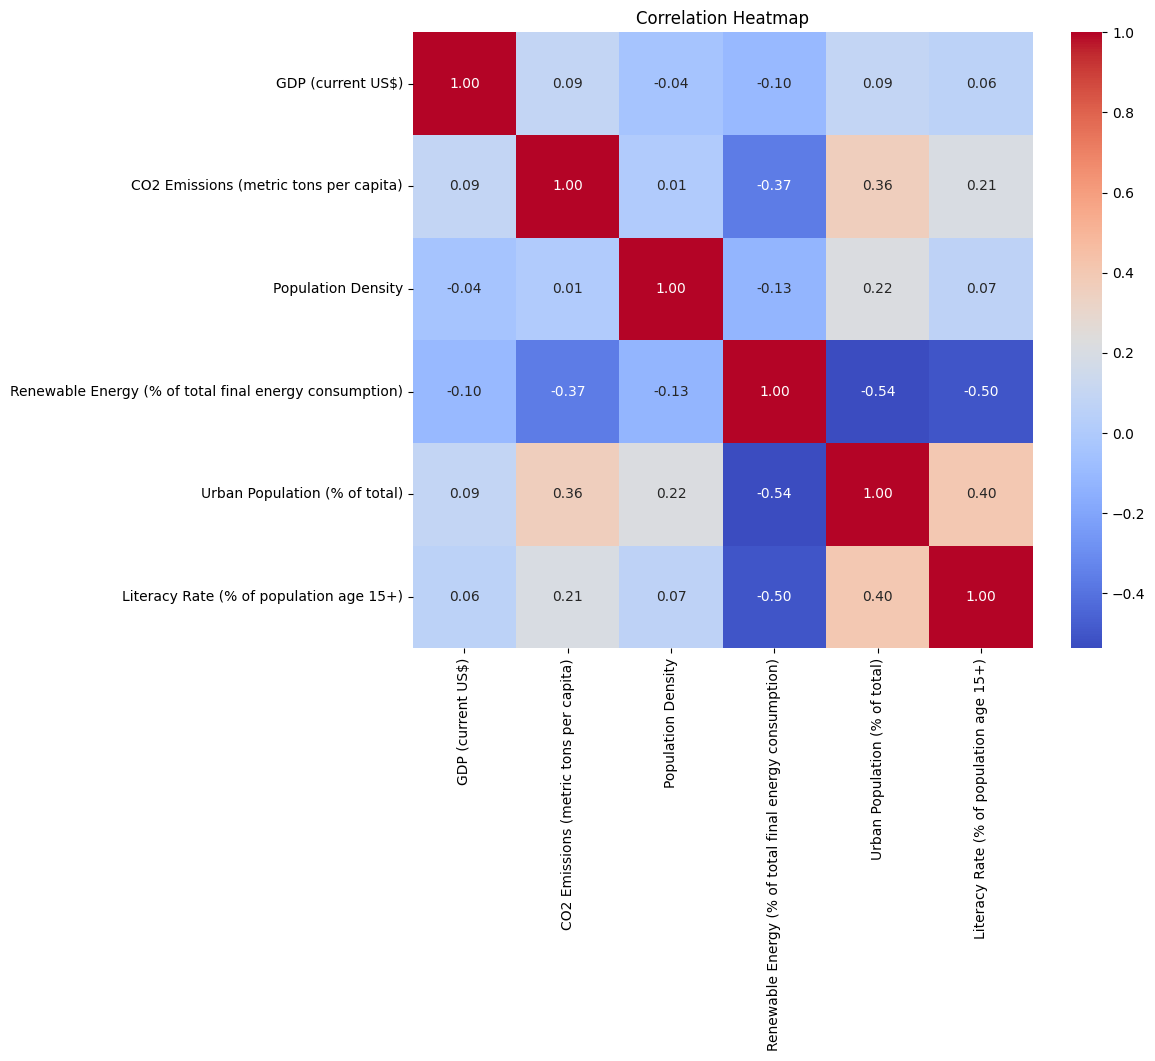

In [111]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter only numeric columns
numeric_data = data.select_dtypes(include=["float64", "int64"])

# Compute correlation matrix
correlation = numeric_data.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

In [112]:
# Create an emissions intensity metric (emissions per GDP)
data["Emissions Intensity"] = data["CO2 Emissions (metric tons per capita)"] / data["GDP (current US$)"]

# Create a renewable energy ratio (renewable energy % * urban population %)
data["Renewable Energy Urban Impact"] = data["Renewable Energy (% of total final energy consumption)"] * \
                                        data["Urban Population (% of total)"] / 100

data.head()


,Country,Year,GDP (current US$),CO2 Emissions (metric tons per capita),Population Density,Renewable Energy (% of total final energy consumption),Urban Population (% of total),Literacy Rate (% of population age 15+),Emissions Intensity,Renewable Energy Urban Impact
3,Africa Eastern and Southern,1970-01-01 00:00:00.000002020,9.333918e+11,0.847934,46.779514,66.123449,36.884034,72.855759,9.084437e-13,24.388996
4,Africa Eastern and Southern,1970-01-01 00:00:00.000002019,1.009721e+12,0.978050,45.533465,63.387090,36.384272,72.658661,9.686339e-13,23.062931
5,Africa Eastern and Southern,1970-01-01 00:00:00.000002018,1.012306e+12,0.990389,44.310939,62.242631,35.893398,71.495399,9.783493e-13,22.340995
6,Africa Eastern and Southern,1970-01-01 00:00:00.000002017,9.729989e+11,1.005969,43.115820,61.891132,35.396289,71.029984,1.033885e-12,21.907164
7,Africa Eastern and Southern,1970-01-01 00:00:00.000002016,8.289428e+11,1.017291,41.991554,62.457688,34.919544,71.105171,1.227215e-12,21.809940


In [113]:
from sklearn.linear_model import LinearRegression  # For regression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Prepare data for ML
ml_data = data.dropna(subset=["CO2 Emissions (metric tons per capita)", "GDP (current US$)"])
X = ml_data.drop(columns=["CO2 Emissions (metric tons per capita)","Country","Year"])
y = ml_data["CO2 Emissions (metric tons per capita)"]


# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a linear regression model
model = make_pipeline(StandardScaler(), LinearRegression())
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R^2 Score:", r2_score(y_test, y_pred))


Mean Squared Error: 21.39206303908884
R^2 Score: 0.7024100224648803


In [114]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
import joblib
import streamlit as st

# Prepare data for ML
ml_data = data.dropna(subset=["CO2 Emissions (metric tons per capita)", "GDP (current US$)"])
ml_data["Log GDP"] = np.log1p(ml_data["GDP (current US$)"])  # Log-transform GDP
X = ml_data.drop(columns=["CO2 Emissions (metric tons per capita)", "Country", "Year", "GDP (current US$)"])
y = ml_data["CO2 Emissions (metric tons per capita)"]

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a linear regression model with scaling
model = make_pipeline(StandardScaler(), LinearRegression())
model.fit(X_train, y_train)

# Cross-validation scores
cv_scores = cross_val_score(model, X, y, cv=5, scoring="r2")
print("Cross-validated R^2:", np.mean(cv_scores))

# Predict and evaluate
y_pred = model.predict(X_test)
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R^2 Score:", r2_score(y_test, y_pred))

Cross-validated R^2: 0.36712748755259506
Mean Squared Error: 20.43625375204111
R^2 Score: 0.7157065083503532


In [115]:
coef = model.named_steps["linearregression"].coef_
feature_importance = pd.DataFrame({"Feature": X.columns, "Coefficient": coef})
print(feature_importance)


                                             Feature  Coefficient
0                                 Population Density    -0.564874
1  Renewable Energy (% of total final energy cons...     0.760026
2                      Urban Population (% of total)     2.733814
3            Literacy Rate (% of population age 15+)     0.120315
4                                Emissions Intensity     5.105702
5                      Renewable Energy Urban Impact    -2.191597
6                                            Log GDP     1.355124


In [116]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
import joblib

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
grid_search = GridSearchCV(RandomForestRegressor(), param_grid, cv=3, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_

# Predictions and Evaluation
y_pred = best_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
cross_val_r2 = cross_val_score(best_model, X, y, cv=5, scoring="r2").mean()
print("Random Forest Regressor",r2)


Random Forest Regressor 0.9683939719986505


In [117]:
# Feature Importance
feature_importance = pd.DataFrame({
    "Feature": X.columns,
    "Importance": best_model.feature_importances_,
}).sort_values(by="Importance", ascending=False)

print(feature_importance)

# Save the model
joblib.dump(best_model, "co2_emission_model.pkl")
print("Model saved successfully!")

                                             Feature  Importance
4                                Emissions Intensity    0.503548
6                                            Log GDP    0.139254
2                      Urban Population (% of total)    0.122849
5                      Renewable Energy Urban Impact    0.079847
1  Renewable Energy (% of total final energy cons...    0.074578
0                                 Population Density    0.050923
3            Literacy Rate (% of population age 15+)    0.029002
Model saved successfully!
